In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import zscore
from scipy import stats
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from warnings import filterwarnings
filterwarnings("ignore")

# Linear Regression

In [2]:
df1=pd.read_csv('cubic_zirconia.csv')

In [3]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df1.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [5]:
df1.shape

(26967, 11)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
data=pd.get_dummies(df1,columns=['cut','color','clarity'],drop_first=True)

In [8]:
data.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,...,0,0,0,0,0,0,0,0,1,0


In [9]:
data.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [10]:
data_model=data.drop(columns=['Unnamed: 0'],axis=1)

In [11]:
data_model.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [12]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [14]:
df1.describe(include=['object']).T

,count,unique,top,freq
cut,26967,5,Ideal,10816
color,26967,7,G,5661
clarity,26967,8,SI1,6571


In [15]:
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [16]:
df1[df1['depth'].isnull() == True ]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [17]:
df1['depth'] = np.where(df1['depth'].isnull() == True , df1['depth'].mean(), df1['depth'] )

In [18]:
for col in df1.columns:
    count=(df1[col] == 0).sum()
    print ('Number of zero values for the {} is {}'.format(col,count))

Number of zero values for the carat is 0
Number of zero values for the cut is 0
Number of zero values for the color is 0
Number of zero values for the clarity is 0
Number of zero values for the depth is 0
Number of zero values for the table is 0
Number of zero values for the x is 3
Number of zero values for the y is 3
Number of zero values for the z is 9
Number of zero values for the price is 0


In [19]:
df1[df1['x'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [20]:
df1[df1['z'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [21]:
df1['x']=np.where(df1['x'] == 0,df1['x'].mean(),df1['x'])
df1['y']=np.where(df1['y'] == 0,df1['y'].mean(),df1['y'])
df1['z']=np.where(df1['z'] == 0,df1['z'].mean(),df1['z'])

In [22]:
for col in df1.columns:
    count=(df1[col] == 0).sum()
    print ('Number of zero values for the {} is {}'.format(col,count))

Number of zero values for the carat is 0
Number of zero values for the cut is 0
Number of zero values for the color is 0
Number of zero values for the clarity is 0
Number of zero values for the depth is 0
Number of zero values for the table is 0
Number of zero values for the x is 0
Number of zero values for the y is 0
Number of zero values for the z is 0
Number of zero values for the price is 0


In [23]:
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [24]:
print('cut\n',df1.cut.value_counts())
print('\n')
print('color\n',df1.color.value_counts())
print('\n')
print('clarity\n',df1.clarity.value_counts())
print('\n')

cut
 Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64


color
 G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64


clarity
 SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64




In [25]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df1.shape)

Number of duplicate rows = 34
(26967, 10)


In [26]:
print('Before',df1.shape)
df1.drop_duplicates(inplace=True) 
print('After',df1.shape)

Before (26967, 10)
After (26933, 10)


In [27]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


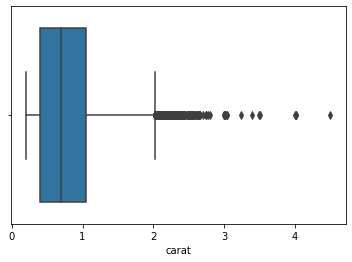

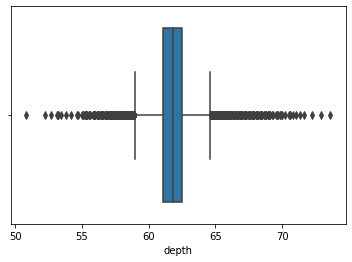

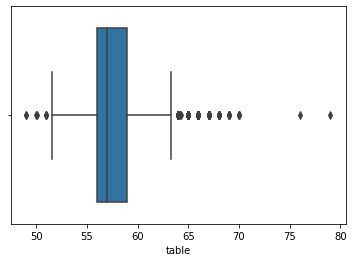

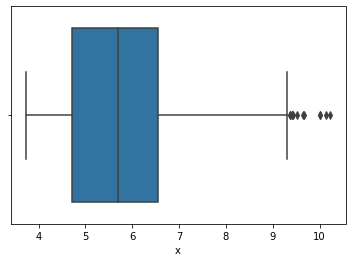

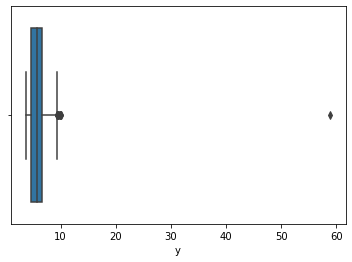

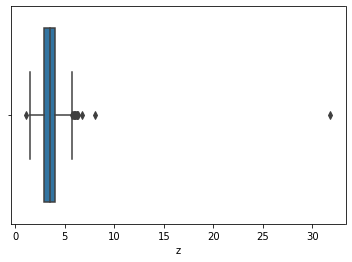

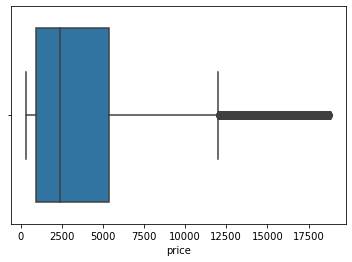

In [30]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df1[i],whis=1.5)
    plt.show();

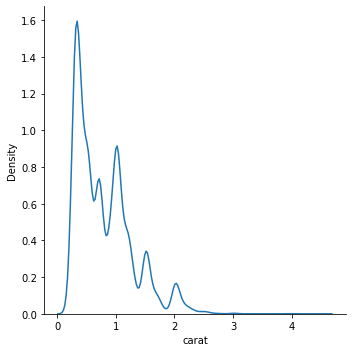

In [31]:
sns.displot(data=df1, x='carat',kind='kde')

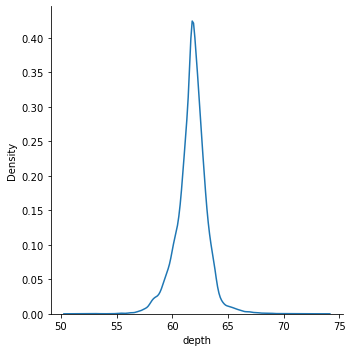

In [32]:
sns.displot(data=df1, x='depth',kind='kde')

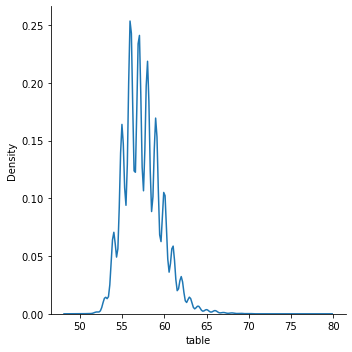

In [33]:
sns.displot(data=df1, x='table',kind='kde')

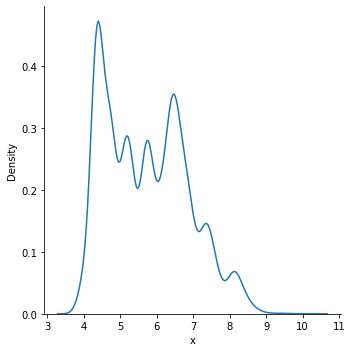

In [34]:
sns.displot(data=df1, x='x',kind='kde')

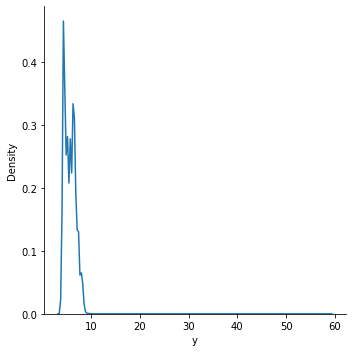

In [35]:
sns.displot(data=df1, x='y',kind='kde')

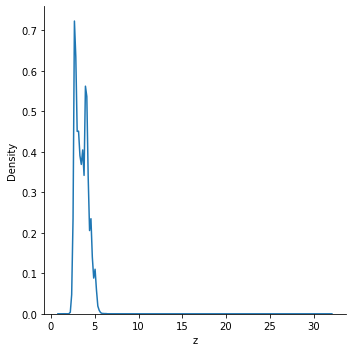

In [36]:
sns.displot(data=df1, x='z',kind='kde')

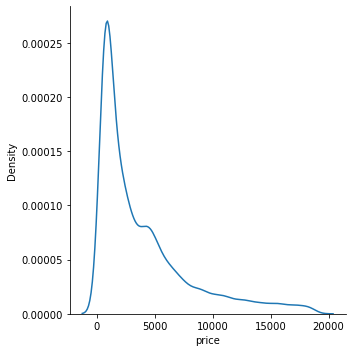

In [37]:
sns.displot(data=df1, x='price',kind='kde')

In [38]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [39]:
for column in df1[cols].columns:
    linear,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<linear,linear,df1[column])

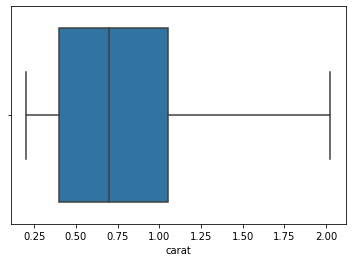

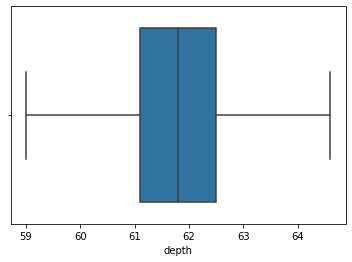

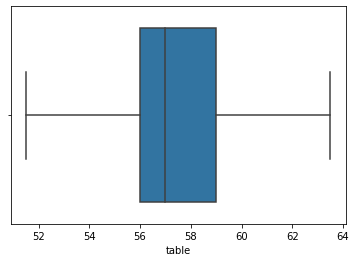

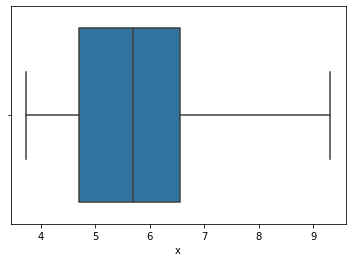

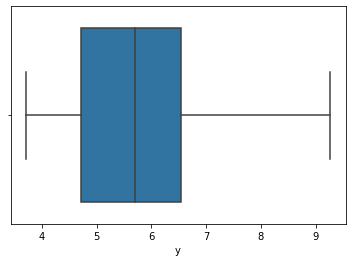

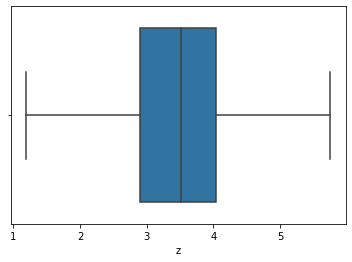

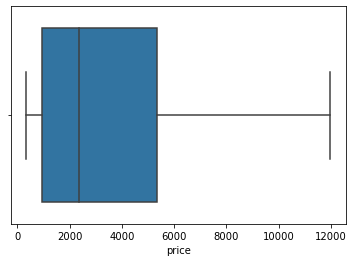

In [40]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df1[i],whis=1.5)
    plt.show();

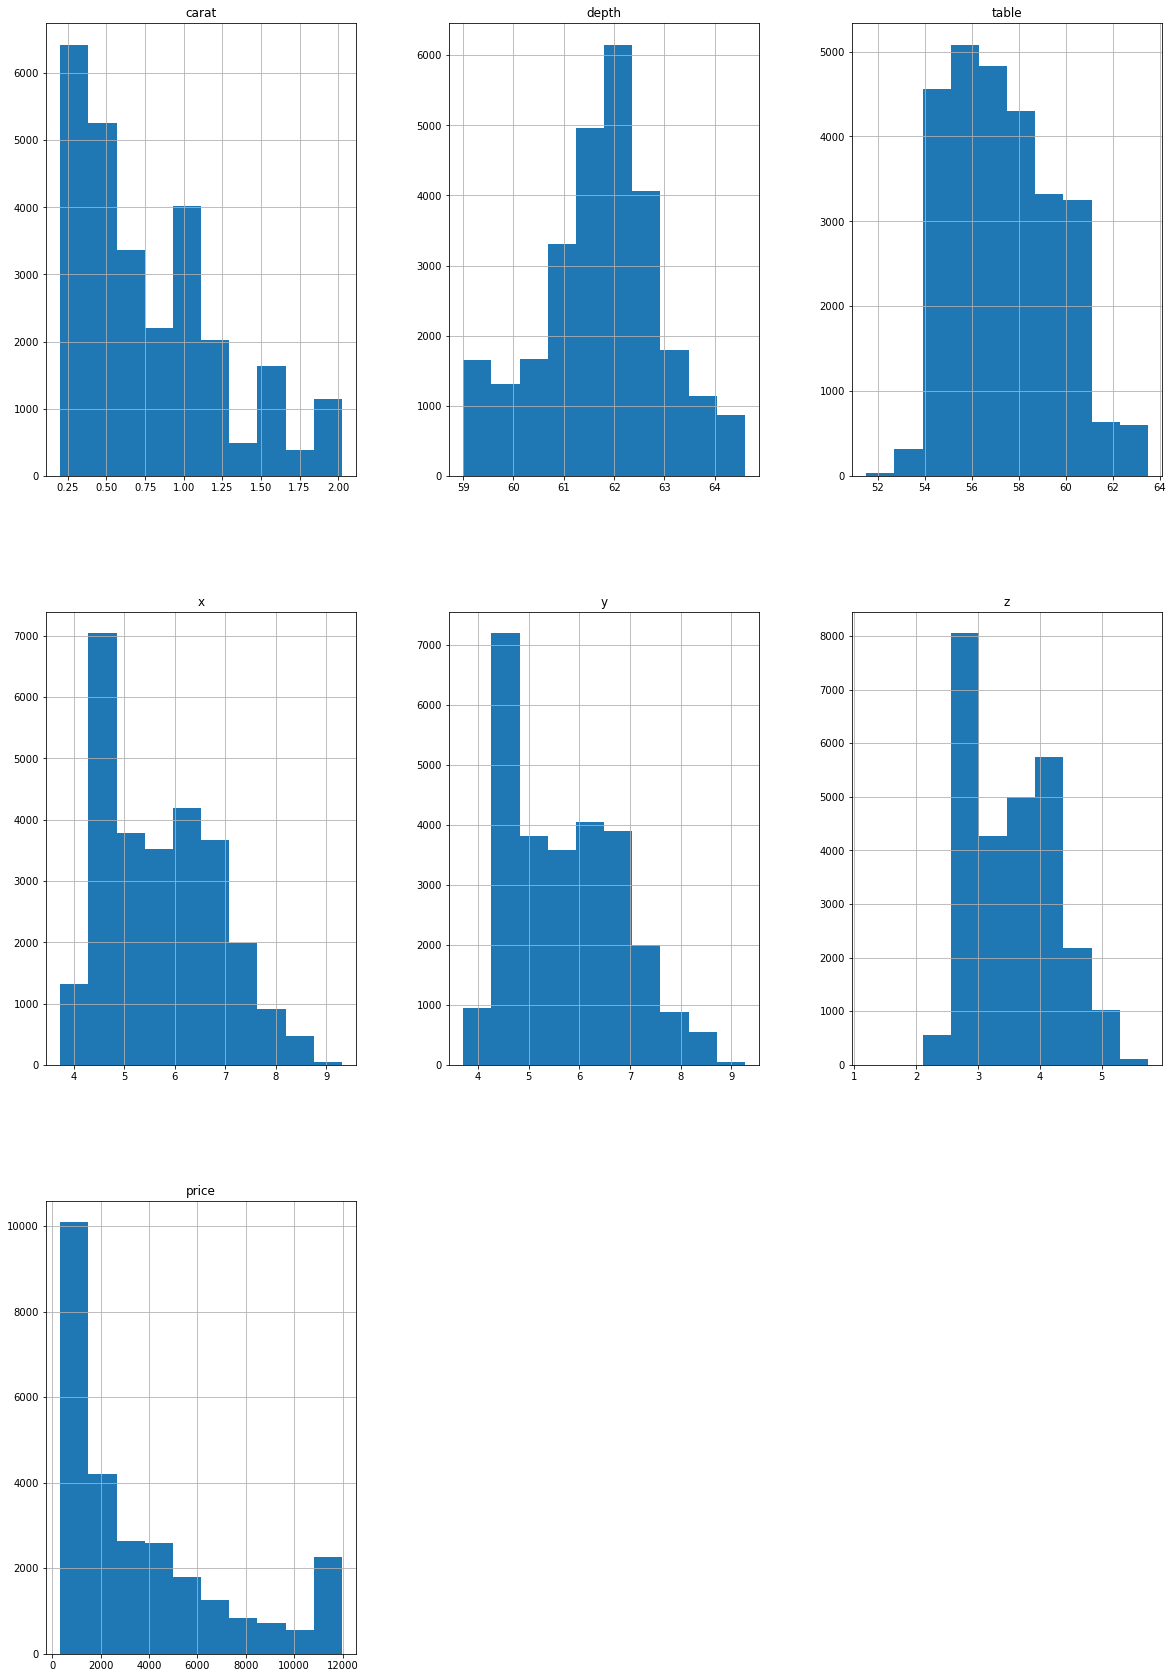

In [41]:
df1.hist(figsize=(20,30));

In [42]:
df1.skew()

carat    0.917162
depth   -0.191173
table    0.480121
x        0.397755
y        0.393956
z        0.394877
price    1.157688
dtype: float64

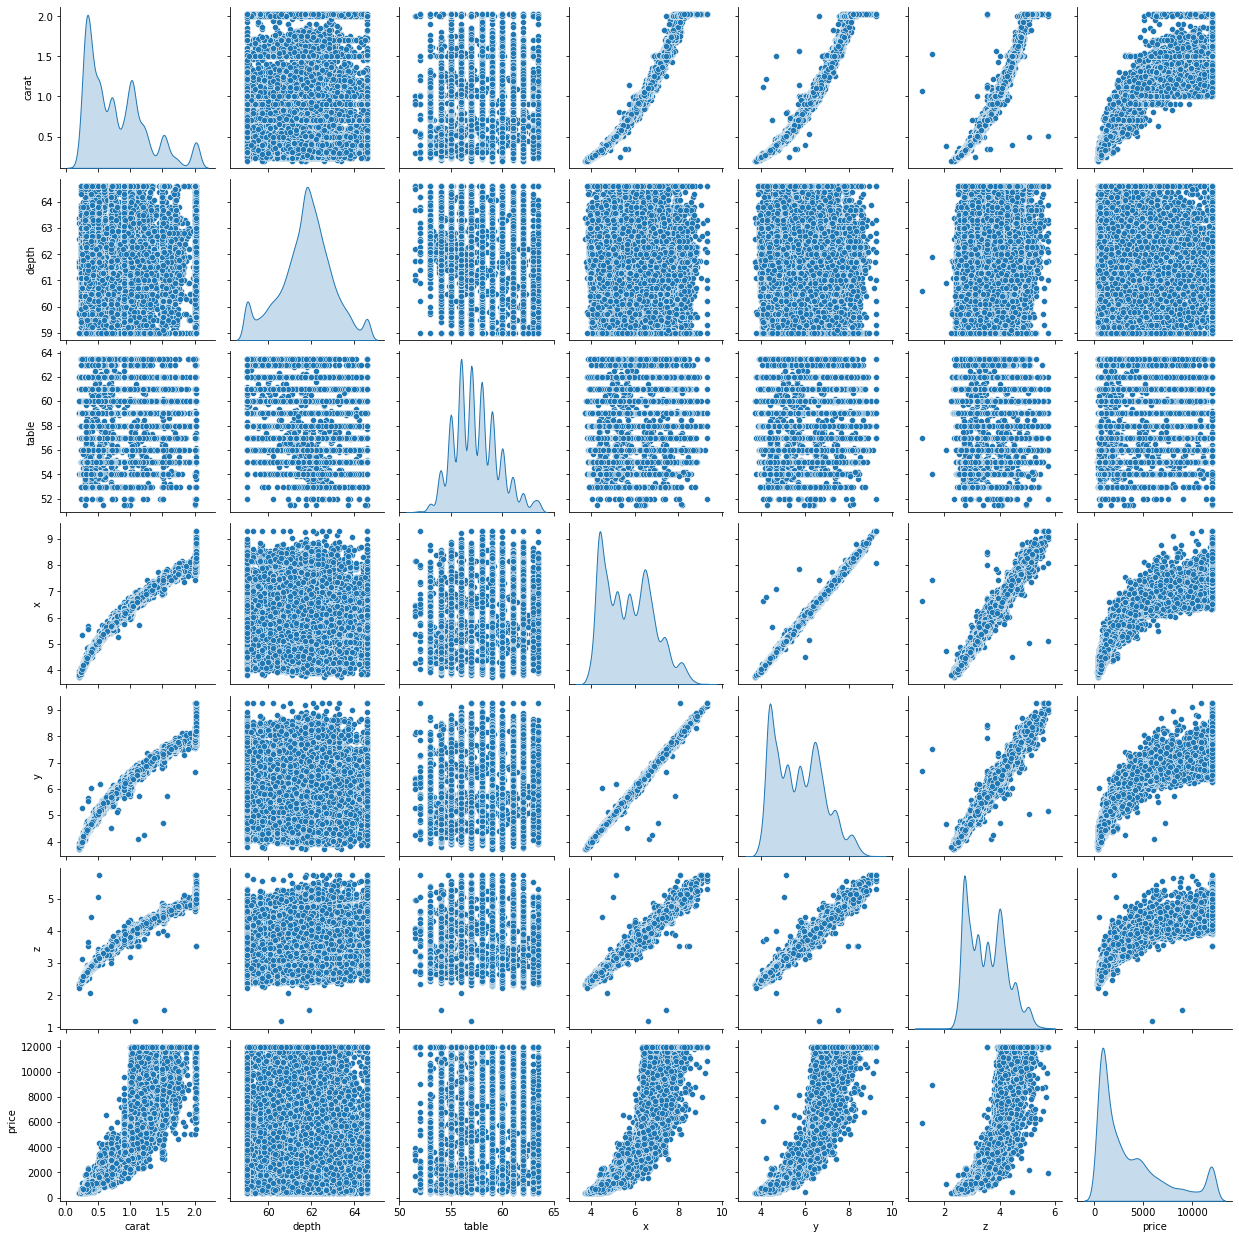

In [43]:
sns.pairplot(data=df1, diag_kind='kde')

<AxesSubplot:>

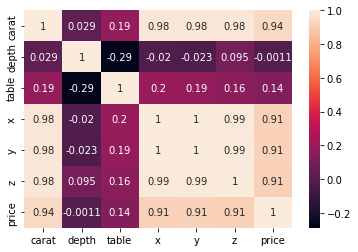

In [44]:
sns.heatmap(df1.corr(),annot=True)

<AxesSubplot:>

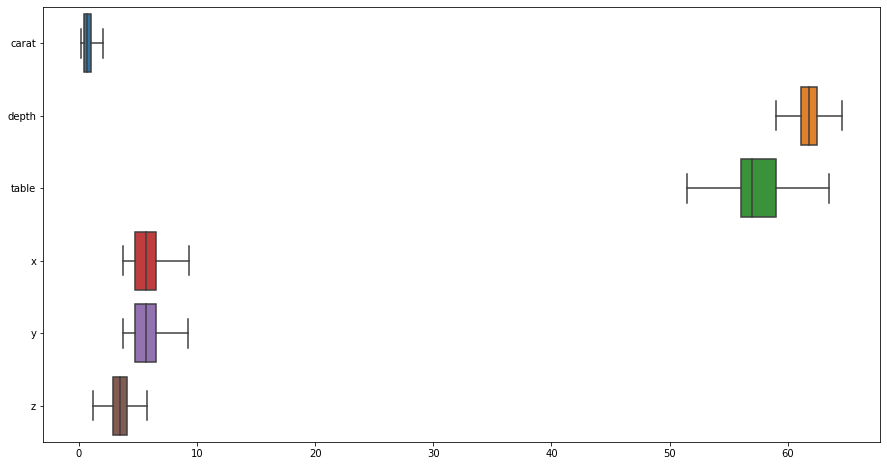

In [45]:
plt.figure(figsize=(15,8))  
sns.boxplot(data=df1[['carat','depth','table','x','y','z']] , orient='h')

<AxesSubplot:>

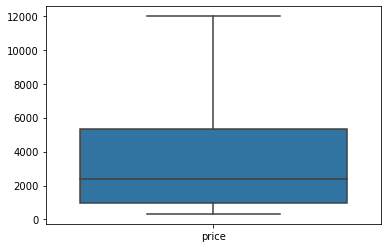

In [46]:
sns.boxplot(data=df1[['price']] , orient='v') 

In [47]:
from scipy.stats import zscore

In [48]:
for col in df1.columns:  
    if df1[col].dtype != 'object':
        df1[[col]] = df1[[col]].apply(zscore)

In [49]:
for col in df1.columns:
    if df1[col].dtype != 'object':
        print('Records greater than 3 standard deviation for column {} is {}'.format(col,df1[df1[col] > 3][col].count()))
        print('Records less than -3 standard deviation column {} is {}'.format(col,df1[df1[col] < -3][col].count()))


Records greater than 3 standard deviation for column carat is 0
Records less than -3 standard deviation column carat is 0
Records greater than 3 standard deviation for column depth is 0
Records less than -3 standard deviation column depth is 0
Records greater than 3 standard deviation for column table is 0
Records less than -3 standard deviation column table is 0
Records greater than 3 standard deviation for column x is 16
Records less than -3 standard deviation column x is 0
Records greater than 3 standard deviation for column y is 16
Records less than -3 standard deviation column y is 0
Records greater than 3 standard deviation for column z is 18
Records less than -3 standard deviation column z is 1
Records greater than 3 standard deviation for column price is 0
Records less than -3 standard deviation column price is 0


In [50]:
for col in df1.columns:
    if df1[col].dtype != 'object':
        df1[[col]] = np.where(df1[[col]] > 3, 3,df1[[col]])
        df1[[col]] = np.where(df1[[col]] < -3, -3, df1[[col]] )

In [51]:
for col in df1.columns:
    if df1[col].dtype != 'object':
        print('Records greater than 3 standard deviation for column {} is {}'.format(col,df1[df1[col] > 3][col].count()))
        print('Records less than -3 standard deviation column {} is {}'.format(col,df1[df1[col] < -3][col].count()))

Records greater than 3 standard deviation for column carat is 0
Records less than -3 standard deviation column carat is 0
Records greater than 3 standard deviation for column depth is 0
Records less than -3 standard deviation column depth is 0
Records greater than 3 standard deviation for column table is 0
Records less than -3 standard deviation column table is 0
Records greater than 3 standard deviation for column x is 0
Records less than -3 standard deviation column x is 0
Records greater than 3 standard deviation for column y is 0
Records less than -3 standard deviation column y is 0
Records greater than 3 standard deviation for column z is 0
Records less than -3 standard deviation column z is 0
Records greater than 3 standard deviation for column price is 0
Records less than -3 standard deviation column price is 0


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.3+ MB


<AxesSubplot:xlabel='cut', ylabel='count'>

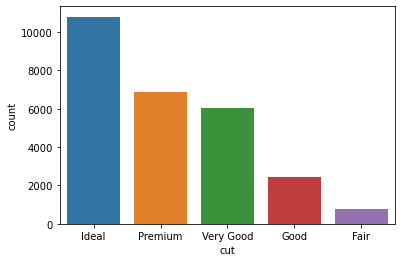

In [53]:
sns.countplot(df1['cut'],order=df1['cut'].value_counts().index) 

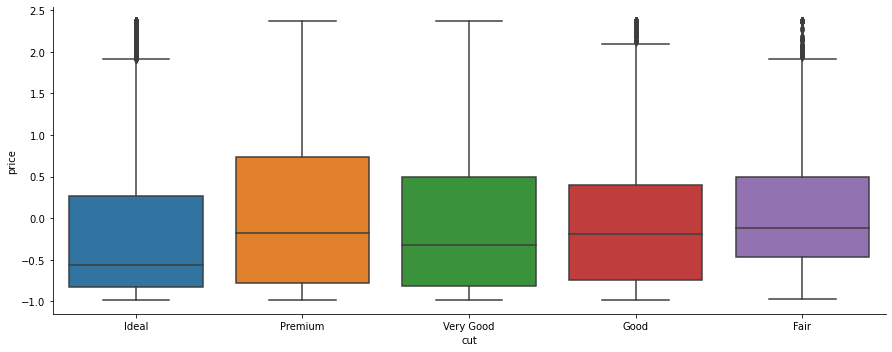

In [54]:
sns.catplot(x='cut', y='price',  kind='box',data=df1, aspect=2.5)

<AxesSubplot:xlabel='color', ylabel='count'>

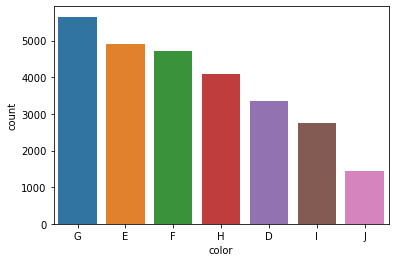

In [55]:
sns.countplot(df1['color'],order=df1['color'].value_counts().index) 

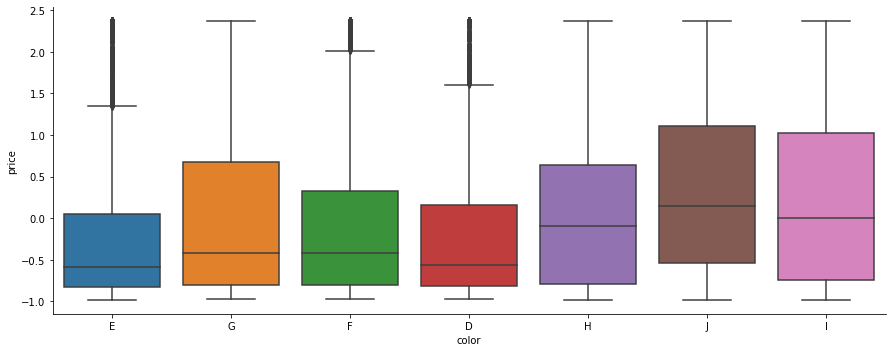

In [56]:
sns.catplot(x='color', y='price', data=df1, aspect =2.5, kind='box')

<AxesSubplot:xlabel='clarity', ylabel='count'>

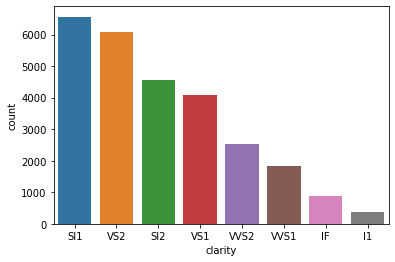

In [57]:
sns.countplot(df1['clarity'],order=df1['clarity'].value_counts().index)

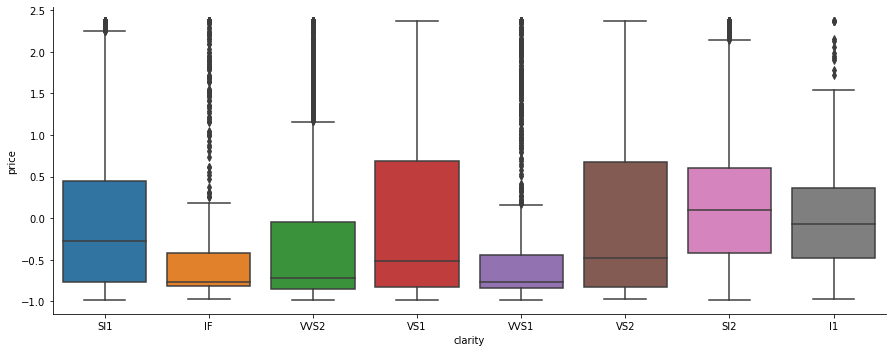

In [58]:
sns.catplot(x='clarity', y='price', data=df1, aspect =2.5, kind='box')

In [59]:
for col in df1.columns: 
    if df1[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(df1[col].unique()))
        print(pd.Categorical(df1[col].unique()).codes)
        df1[col] = pd.Categorical(df1[col]).codes



Column Name: cut
['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
[2 3 4 1 0]


Column Name: color
['E', 'G', 'F', 'D', 'H', 'J', 'I']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
[1 3 2 0 4 6 5]


Column Name: clarity
['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1']
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']
[2 1 7 4 6 5 3 0]


In [60]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067471,2,1,2,0.288029,0.261676,-1.296638,-1.289794,-1.261746,-0.933304
1,-1.002552,3,3,1,-0.778874,0.261676,-1.163386,-1.137688,-1.204239,-0.793460
2,0.230898,4,1,7,0.370098,1.188856,0.275740,0.347581,0.348458,0.736177
3,-0.807797,2,2,4,-0.122318,-0.665503,-0.808046,-0.833477,-0.830441,-0.765203
4,-1.045831,2,2,6,-1.107151,0.725266,-1.225570,-1.164531,-1.276123,-0.852569


In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int8   
 2   color    26933 non-null  int8   
 3   clarity  26933 non-null  int8   
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), int8(3)
memory usage: 2.7 MB


In [62]:
X=df1.drop('price',axis=1)  
Y=df1.pop('price')

In [63]:
clf=LinearRegression()

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=0)

In [66]:
clf.fit(X_train,y_train)

LinearRegression()

In [67]:
for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {}  is {} '.format(col_name,clf.coef_[idx]))

The coefficient for carat  is 1.2317004645290428 
The coefficient for cut  is 0.010996132693645352 
The coefficient for color  is -0.06630633021050004 
The coefficient for clarity  is 0.07201131818074102 
The coefficient for depth  is -0.01328663344803739 
The coefficient for table  is -0.044248281022174187 
The coefficient for x  is -0.5654813385056425 
The coefficient for y  is 0.5752322029396708 
The coefficient for z  is -0.24284717533841982 


In [68]:
intercept=clf.intercept_
intercept

-0.13354949628539142

In [69]:
clf.score(X_train,y_train)

0.909722965288783

In [70]:
clf.score(X_test,y_test)

0.910067023920961

In [71]:
data_train=pd.concat([X_train,y_train],axis=1)

In [72]:
data_train.info()
data_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18853 entries, 8747 to 2732
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    18853 non-null  float64
 1   cut      18853 non-null  int8   
 2   color    18853 non-null  int8   
 3   clarity  18853 non-null  int8   
 4   depth    18853 non-null  float64
 5   table    18853 non-null  float64
 6   x        18853 non-null  float64
 7   y        18853 non-null  float64
 8   z        18853 non-null  float64
 9   price    18853 non-null  float64
dtypes: float64(7), int8(3)
memory usage: 1.2 MB


,carat,cut,color,clarity,depth,table,x,y,z,price
8747,0.858444,2,1,3,-1.271290,-0.201914,0.986420,1.018637,0.851646,0.571247
13821,-0.937634,2,0,5,-0.614735,-0.665503,-0.976832,-1.021372,-1.046094,-0.761743
13582,0.880083,1,5,2,1.108723,0.261676,0.826517,0.884426,0.981037,0.293001
9952,-1.197308,4,1,6,-0.860943,1.188856,-1.527609,-1.495585,-1.563659,-0.937341
25530,-0.634681,4,2,7,0.041820,-0.665503,-0.550425,-0.520317,-0.528528,-0.485514


In [73]:
import statsmodels.formula.api as smf

In [74]:
lm_train = smf.ols(formula='price ~ carat + cut + color + clarity + depth + table + x + y + z ',data=data_train).fit()

In [75]:
lm_train.params

Intercept   -0.133549
carat        1.231700
cut          0.010996
color       -0.066306
clarity      0.072011
depth       -0.013287
table       -0.044248
x           -0.565481
y            0.575232
z           -0.242847
dtype: float64

In [76]:
print(lm_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.110e+04
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:37:00   Log-Likelihood:                -4053.4
No. Observations:               18853   AIC:                             8127.
Df Residuals:                   18843   BIC:                             8205.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1335      0.008    -15.757      0.0

In [77]:
mse_test=np.mean((clf.predict(X_test)-y_test)**2)
mse_train=np.mean(clf.predict(X_train)-y_train)**2
print('MSE for training is {} and testing is {}'.format(mse_train,mse_test))

MSE for training is 1.4175450297556346e-33 and testing is 0.0905626683290237


In [78]:
import math

In [79]:
print('Root mean squared error for training is {} and Testing is {}'.format(math.sqrt(mse_train),math.sqrt(mse_test)))

Root mean squared error for training is 3.7650299198753184e-17 and Testing is 0.3009363193917007


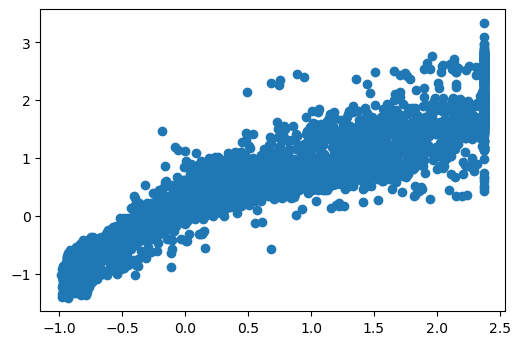

In [80]:
y_pred=clf.predict(X_test)
plt.rcParams['figure.dpi']=100
plt.scatter(y_test,y_pred)

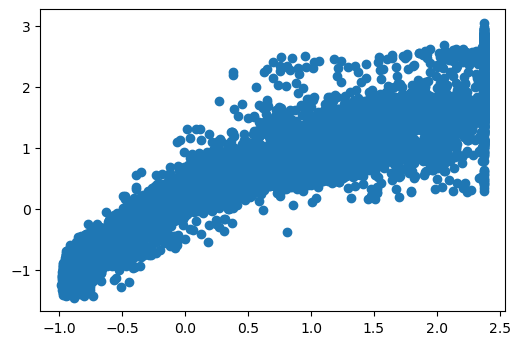

In [81]:
plt.rcParams['figure.dpi']=100
plt.scatter(y_train,clf.predict(X_train))

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
vif=[variance_inflation_factor(X.values,ix) for ix in range(X.shape[1])]

In [84]:
i=0
for column in X.columns:
    if i < 9:
        print (column , "---> ", vif[i])
        i=i+1

carat --->  32.382067476175415
cut --->  4.392514735224379
color --->  3.1075548811653078
clarity --->  4.295502956164738
depth --->  3.968254141554328
table --->  1.1797906436830687
x --->  407.6170701894269
y --->  392.0848395319303
z --->  212.62963706427703


In [85]:
lm_train1= smf.ols(formula='price ~ carat + cut + color + clarity + depth + table ',data=data_train).fit()

In [86]:
print(lm_train1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 3.070e+04
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:37:00   Log-Likelihood:                -4316.2
No. Observations:               18853   AIC:                             8646.
Df Residuals:                   18846   BIC:                             8701.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1607      0.009    -18.900      0.0

In [87]:
vif1=[variance_inflation_factor(X[['carat','cut','color','clarity','depth','table']].values,ix) 
 for ix in range(X[['carat','cut','color','clarity','depth','table']].shape[1])]

In [94]:
i=0
for column in X.columns:
    if i < 6:
        print (column , "---> ", vif1[i])
        i=i+1

carat --->  1.1861452404905817
cut --->  4.362967598453272
color --->  3.1003326327170853
clarity --->  4.280757691935794
depth --->  1.114205822020724
table --->  1.15890213106567


# Logistic Regression

In [2]:
df2=pd.read_csv('Holiday_Package.csv')

In [3]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
df2.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [5]:
df2.shape

(872, 8)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [7]:
df2.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [8]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,436.500000,251.869014,1.0,218.75,436.5,654.25,872.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.00,41903.5,53469.50,236961.0
age,872.0,39.955275,10.551675,20.0,32.00,39.0,48.00,62.0
educ,872.0,9.307339,3.036259,1.0,8.00,9.0,12.00,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.00,0.0,0.00,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.00,1.0,2.00,6.0


In [9]:
df2.describe(include=object).T

,count,unique,top,freq
Holliday_Package,872,2,no,471
foreign,872,2,no,656


In [10]:
df2.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [11]:
dups2=df2.duplicated()
print('Number of duplicated rows = %d' % (dups2.sum()))

Number of duplicated rows = 0


In [12]:
print('Holliday_Package\n',df2.Holliday_Package.value_counts())
print('\n')
print('foreign\n',df2.foreign.value_counts())
print('\n')

Holliday_Package
 no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
 no     656
yes    216
Name: foreign, dtype: int64




In [13]:
df2.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

<AxesSubplot:xlabel='foreign', ylabel='count'>

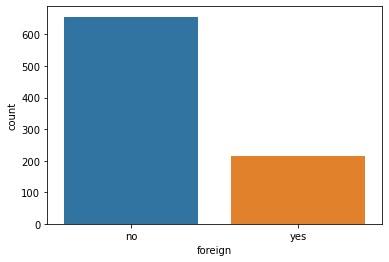

In [14]:
sns.countplot(df2['foreign'],order=df2['foreign'].value_counts().index) 

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

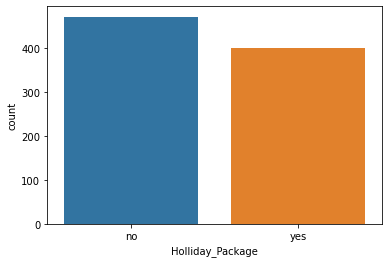

In [15]:
sns.countplot(df2['Holliday_Package'],order=df2['Holliday_Package'].value_counts().index) 

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

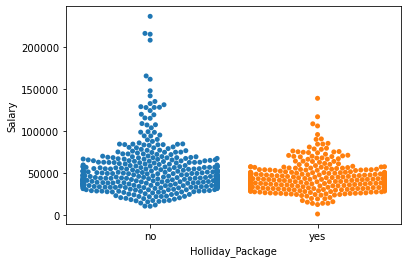

In [16]:
sns.swarmplot(x=df2['Holliday_Package'],y=df2['Salary'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='age'>

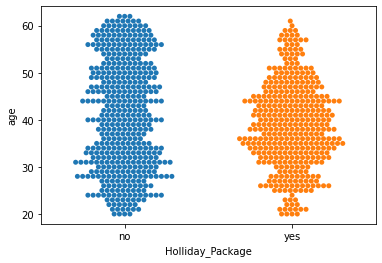

In [17]:
sns.swarmplot(x=df2['Holliday_Package'],y=df2['age'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='educ'>

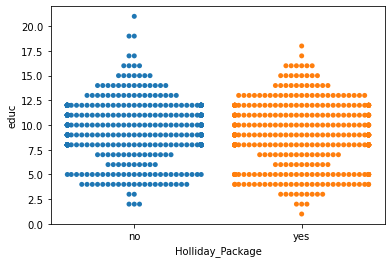

In [18]:
sns.swarmplot(x=df2['Holliday_Package'],y=df2['educ'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_young_children'>

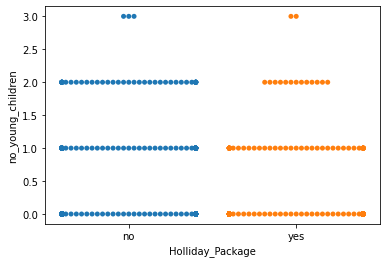

In [19]:
sns.swarmplot(x=df2['Holliday_Package'],y=df2['no_young_children'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_older_children'>

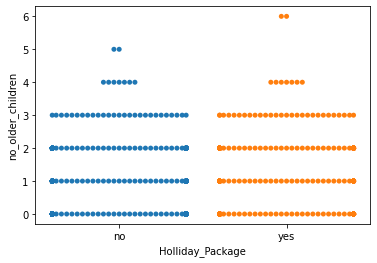

In [20]:
sns.swarmplot(x=df2['Holliday_Package'],y=df2['no_older_children'])

<AxesSubplot:xlabel='age', ylabel='Salary'>

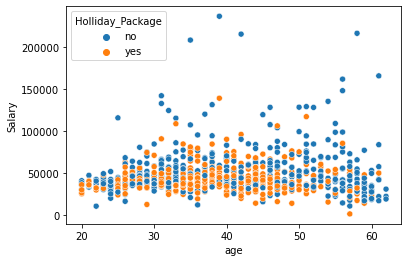

In [21]:
sns.scatterplot(x=df2['age'], y=df2['Salary'], hue=df2['Holliday_Package'])

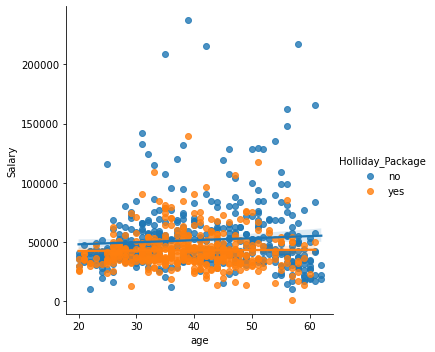

In [22]:
sns.lmplot(x='age', y='Salary', hue='Holliday_Package', data=df2)

<AxesSubplot:xlabel='educ', ylabel='Salary'>

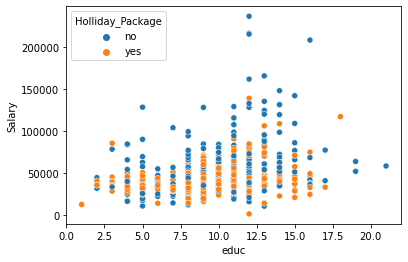

In [23]:
sns.scatterplot(x=df2['educ'], y=df2['Salary'], hue=df2['Holliday_Package'])

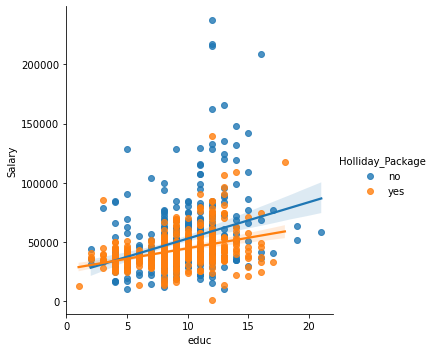

In [24]:
sns.lmplot(x='educ', y='Salary', hue='Holliday_Package', data=df2)

<AxesSubplot:xlabel='no_young_children', ylabel='age'>

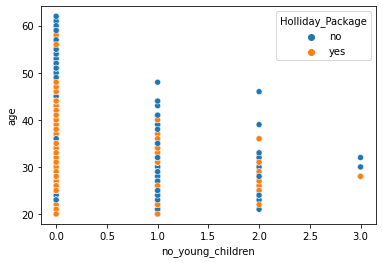

In [25]:
sns.scatterplot(x=df2['no_young_children'], y=df2['age'], hue=df2['Holliday_Package'])

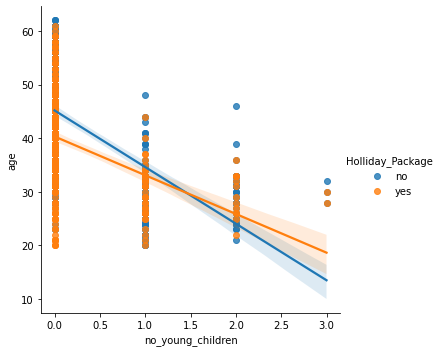

In [26]:
sns.lmplot(x='no_young_children', y='age', hue='Holliday_Package', data=df2)

<AxesSubplot:xlabel='no_older_children', ylabel='age'>

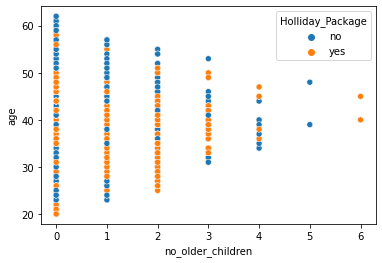

In [27]:
sns.scatterplot(x=df2['no_older_children'], y=df2['age'], hue=df2['Holliday_Package'])

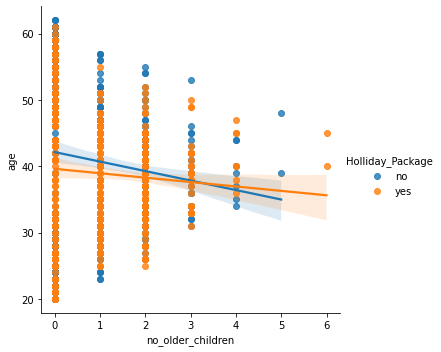

In [28]:
sns.lmplot(x='no_older_children', y='age', hue='Holliday_Package', data=df2)

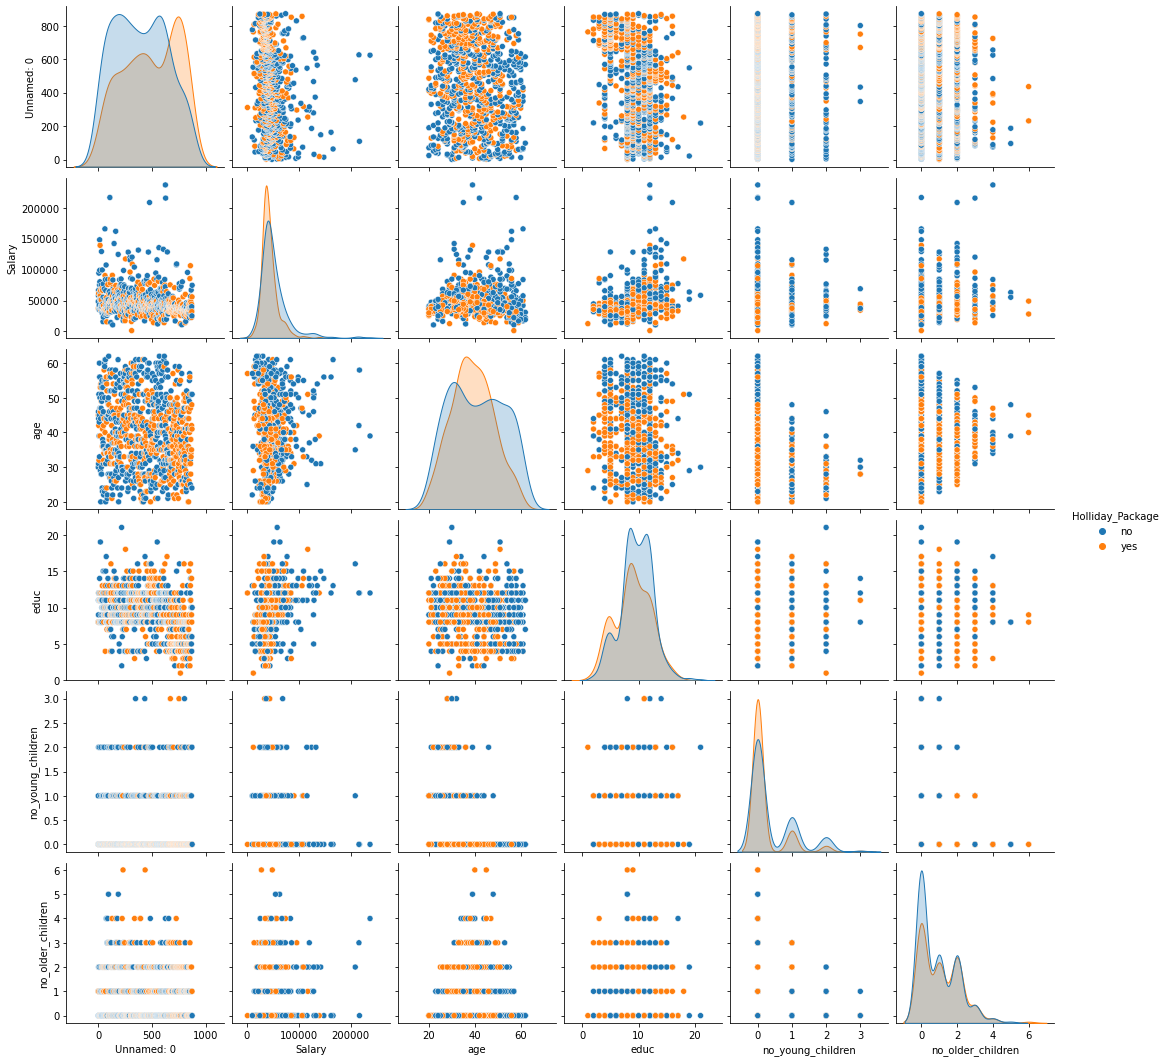

In [29]:
sns.pairplot(df2,hue='Holliday_Package',diag_kind='kde')

<AxesSubplot:>

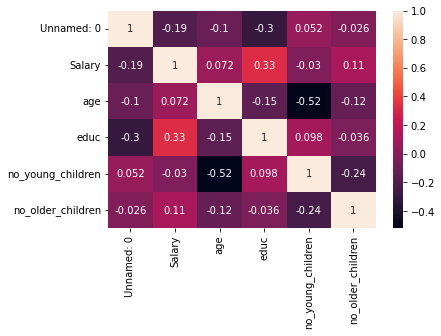

In [30]:
sns.heatmap(df2.corr(),annot=True)

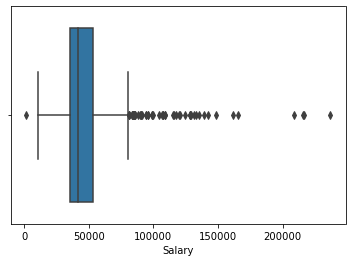

In [31]:
cols = ['Salary']
for i in cols:
    sns.boxplot(df2[i],whis=1.5)
    plt.show();

In [32]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [33]:
for column in df2[cols].columns:
    linear,ur=remove_outlier(df2[column])
    df2[column]=np.where(df2[column]>ur,ur,df2[column])
    df2[column]=np.where(df2[column]<linear,linear,df2[column])

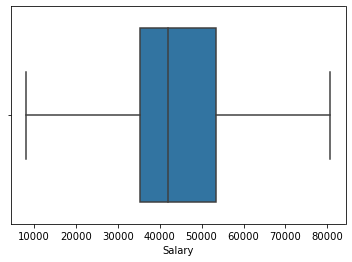

In [34]:
cols = ['Salary']
for i in cols:
    sns.boxplot(df2[i],whis=1.5)
    plt.show();

In [35]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
def checkvif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print (vif)

In [38]:
df2.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [39]:
X = df2[['Salary','age','educ','no_young_children','no_older_children']]
checkvif(X)

           Variables        VIF
0             Salary  10.901163
1                age   7.850789
2               educ   9.902002
3  no_young_children   1.426860
4  no_older_children   1.868826


In [40]:
df2.Holliday_Package.replace(['yes','no'],[1,0],inplace=True)

In [41]:
df2.Holliday_Package.value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [42]:
df2.Holliday_Package.value_counts(normalize=True)

0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int64  
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 47.8+ KB


In [44]:
df2 = pd.get_dummies(df2,drop_first=True)
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [45]:
df2.foreign_yes.value_counts()

0    656
1    216
Name: foreign_yes, dtype: int64

In [46]:
X = df2.drop(['Holliday_Package'], axis=1)
y = df2[['Holliday_Package']]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [48]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
print (df2.shape)

(610, 6)
(262, 6)
(610, 1)
(262, 1)
(872, 7)


In [49]:
y_train.value_counts(normalize=True)

Holliday_Package
0                   0.539344
1                   0.460656
dtype: float64

In [50]:
y_test.value_counts(normalize=True)

Holliday_Package
0                   0.541985
1                   0.458015
dtype: float64

In [63]:
def run_gridsearch(model,param_grid,X_train, train_labels,cv_value=5,scoring_value='accuracy'):
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv_value, n_jobs =-1,scoring=scoring_value)
    print ("\n Running grid search\n")
    grid_search.fit(X_train, train_labels)
    print ("\n Showing best parameters for the grid search\n")
    print (grid_search.best_params_)
    return grid_search

In [64]:
def check_performance(grid_search,X_train, X_test, train_labels, test_labels):
    best_grid = grid_search.best_estimator_
    ytrain_predict = best_grid.predict(X_train)
    ytest_predict = best_grid.predict(X_test)
    print("\n Classification Report for Train dataset\n")
    print(classification_report(train_labels,ytrain_predict))
    print("\n Classification Report for Test dataset\n")
    print(classification_report(test_labels,ytest_predict))

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [67]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [68]:
ytest_predict_prob=model.predict_proba(X_test)

In [69]:
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for training dataset',model.score(X_test, y_test))

Model score for training dataset 0.6672131147540984
Model score for training dataset 0.648854961832061


In [70]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

In [72]:
grid={'penalty':['l2','none','l1'],   
      'solver':['lbfgs','liblinear'],   # 'newton-cg',
      'tol':[0.0001,0.00001]}

In [73]:
lr_model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
cv_value=3
grid_search = run_gridsearch(lr_model,grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)


 Running grid search


 Showing best parameters for the grid search

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.66      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.66      0.65       262



In [77]:
best_model = grid_search.best_estimator_

In [78]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [79]:
ytest_predict_prob=best_model.predict_proba(X_test)

In [86]:
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for training dataset',best_model.score(X_test, y_test))

Model score for training dataset 0.6655737704918033
Model score for training dataset 0.6564885496183206


In [87]:
from sklearn.metrics import confusion_matrix

In [ ]:
# predict probabilities
probs_train = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC for Train dataset: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data')

# predict probabilities
probs_test = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_test,)
print('AUC for test dataset: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

In [89]:
import statsmodels.formula.api as sm

In [90]:
df2.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign_yes'],
      dtype='object')

In [91]:
A1 = 'Holliday_Package ~Salary+age+educ+no_young_children+no_older_children+foreign_yes'

In [92]:
model_1 = sm.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.604108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Sun, 25 Sep 2022   Pseudo R-squ.:                  0.1244
Time:                        18:48:34   Log-Likelihood:                -526.78
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 9.138e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.5432      0.559      4.550      0.000       1.448       3.639
Salary            -2.088e-05   5.26e-06     -3.970      0.000   -3.12e-05   -1.06e-05
age                  -0.0496      0.009     -5.491      0.000      -0.067      -0.032
educ                  0.0342      0.029      1.172      0.241      -0.023       0.091
no_young_children    -1.3287      0.180     -7.386      0.000      -1.681      -0.976
no_older_children    -0.0251      0.074     -0.341      0.733      -0.169       0.119
foreign_yes           1.3037      0.200      6.519      0.000       0.912       1.696
=====================================================================================
"""

In [93]:
A1 = 'Holliday_Package ~Salary+age+educ+no_young_children+no_older_children+foreign_yes'
model_1 = sm.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.604108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Sun, 25 Sep 2022   Pseudo R-squ.:                  0.1244
Time:                        18:49:06   Log-Likelihood:                -526.78
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 9.138e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.5432      0.559      4.550      0.000       1.448       3.639
Salary            -2.088e-05   5.26e-06     -3.970      0.000   -3.12e-05   -1.06e-05
age                  -0.0496      0.009     -5.491      0.000      -0.067      -0.032
educ                  0.0342      0.029      1.172      0.241      -0.023       0.091
no_young_children    -1.3287      0.180     -7.386      0.000      -1.681      -0.976
no_older_children    -0.0251      0.074     -0.341      0.733      -0.169       0.119
foreign_yes           1.3037      0.200      6.519      0.000       0.912       1.696
=====================================================================================
"""

In [94]:
A1 = 'Holliday_Package ~Salary+age+educ+no_young_children+no_older_children+foreign_yes'
model_1 = sm.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.604108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Sun, 25 Sep 2022   Pseudo R-squ.:                  0.1244
Time:                        18:49:40   Log-Likelihood:                -526.78
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 9.138e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.5432      0.559      4.550      0.000       1.448       3.639
Salary            -2.088e-05   5.26e-06     -3.970      0.000   -3.12e-05   -1.06e-05
age                  -0.0496      0.009     -5.491      0.000      -0.067      -0.032
educ                  0.0342      0.029      1.172      0.241      -0.023       0.091
no_young_children    -1.3287      0.180     -7.386      0.000      -1.681      -0.976
no_older_children    -0.0251      0.074     -0.341      0.733      -0.169       0.119
foreign_yes           1.3037      0.200      6.519      0.000       0.912       1.696
=====================================================================================
"""

In [95]:
model_1.params

Intercept            2.543166
Salary              -0.000021
age                 -0.049639
educ                 0.034220
no_young_children   -1.328719
no_older_children   -0.025083
foreign_yes          1.303731
dtype: float64

In [96]:
for i,j in np.array(model_1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(2.54) * Intercept + (-0.0) * Salary + (-0.05) * age + (0.03) * educ + (-1.33) * no_young_children + (-0.03) * no_older_children + (1.3) * foreign_yes + 

In [97]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [108]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [109]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (25,8))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label");

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

In [110]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [ ]:
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [104]:
ss=StandardScaler() 

In [105]:
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)
print (x_train_scaled.shape)
print (X_train.shape)
print (x_test_scaled.shape)
print (X_test.shape)

(610, 6)
(610, 6)
(262, 6)
(262, 6)


In [106]:
x_train_scaled[0]

array([-0.43924382,  0.72340773,  0.86023297, -0.52496388,  0.96332758,
        1.70594736])

In [107]:
X_train_bkp=X_train.copy()
X_test_bkp=X_test.copy()